Author: Ahmed Youri Sobhi [ahmedyousrisobhi@gmail.com]

Creation_date: 7th Sep 2023

Notebook number : 3

Objective: Dataset EDA after cleaning.

Abstract:
- Now the dataset is cleaned, let's dig more into data exploration and analysis.

# Importing Required Libararies and Packages

In [50]:
import warnings
warnings.filterwarnings('ignore')

import os

import pandas as pd
import numpy as np

# Used for visulization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

# For iteration visulization purpose
from tqdm import tqdm

# Data Loading

In [51]:
df = (
    pd.read_csv('../data/intermid/marketing_campaign.csv')
    .assign(
        Dt_Customer= lambda x:pd.to_datetime(x.Dt_Customer, format='%Y-%m-%d')
    )
)

# Display first 5 rows
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,Partner


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2143 non-null   int64         
 1   Year_Birth           2143 non-null   int64         
 2   Education            2143 non-null   object        
 3   Marital_Status       2143 non-null   object        
 4   Income               2143 non-null   float64       
 5   Kidhome              2143 non-null   int64         
 6   Teenhome             2143 non-null   int64         
 7   Dt_Customer          2143 non-null   datetime64[ns]
 8   Recency              2143 non-null   int64         
 9   MntWines             2143 non-null   int64         
 10  MntFruits            2143 non-null   int64         
 11  MntMeatProducts      2143 non-null   int64         
 12  MntFishProducts      2143 non-null   int64         
 13  MntSweetProducts     2143 non-nul

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2143.0,5577.097993,3254.677178,0.0,2800.0,5453.0,8417.0,11191.0
Year_Birth,2143.0,1968.919739,11.927657,1893.0,1960.0,1970.0,1977.0,1996.0
Income,2143.0,51172.612692,20276.965107,4428.0,34951.0,50616.0,67269.5,113734.0
Kidhome,2143.0,0.451703,0.539197,0.0,0.0,0.0,1.0,2.0
Teenhome,2143.0,0.511433,0.543818,0.0,0.0,0.0,1.0,2.0
Recency,2143.0,49.010733,28.957975,0.0,24.0,49.0,74.0,99.0
MntWines,2143.0,286.915539,310.752015,0.0,23.0,170.0,483.0,1296.0
MntFruits,2143.0,26.161456,39.687941,0.0,2.0,8.0,32.0,199.0
MntMeatProducts,2143.0,159.041064,211.673063,0.0,15.0,64.0,217.0,984.0
MntFishProducts,2143.0,37.559029,55.148125,0.0,3.0,12.0,50.0,259.0


# Multi-Varient Analysis

## 1- Customer Purchase Behavior Analysis
Description: This analysis aims to analysis the customer spending behavior on various product categories (e.g., wine, meat, fruit) and how it relates to their household composition (e.g. Income, Kids)

### What is the most bought product?

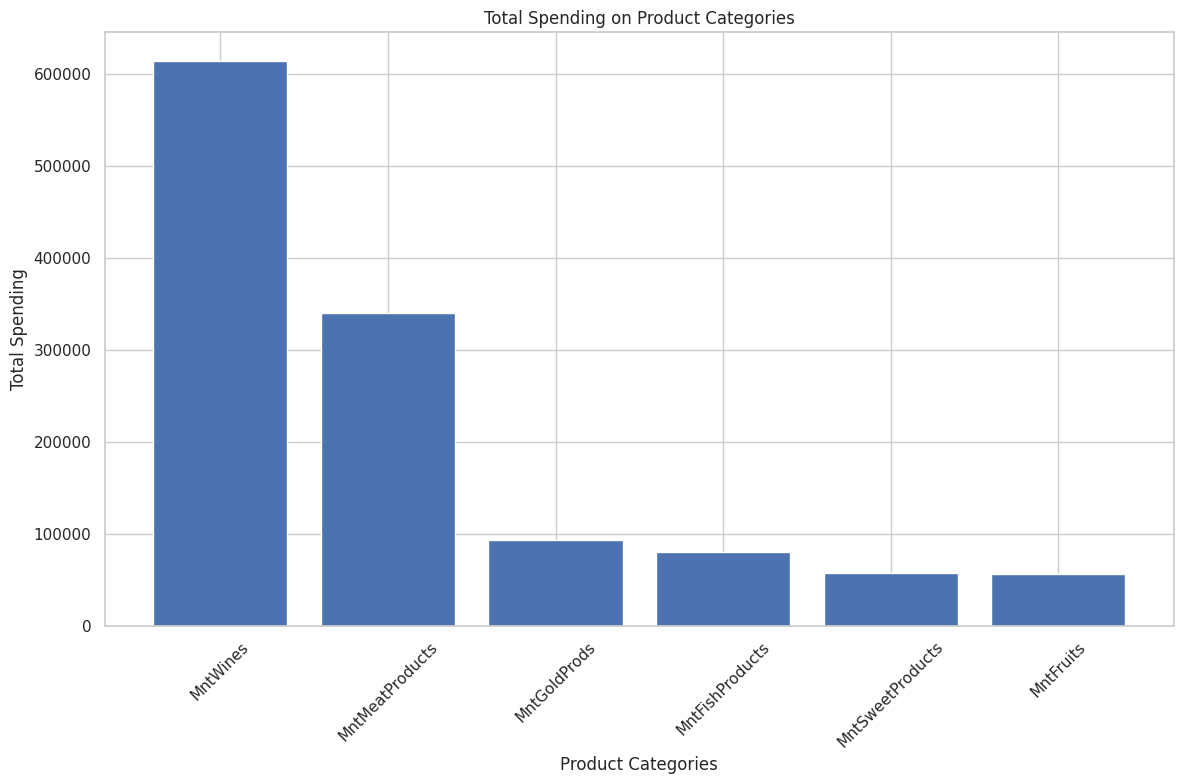

In [54]:
# Bar plot of spending on wine
df_product_speding = (
    df[df.columns[9:15]].sum()
    .reset_index()
    .rename(columns={'index':'products', 0:'spending'})
    .sort_values(by='spending', ascending=False)
)

plt.figure(figsize=(12, 8))
plt.bar(df_product_speding.products, df_product_speding.spending)
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.title('Total Spending on Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../report/plots/Total Spending on Product Categories.jpg')
plt.show()

Insights: The most common purchased products were [Wines, Meats]

### Let's Visualize Purchase Behaviour over Education Factor

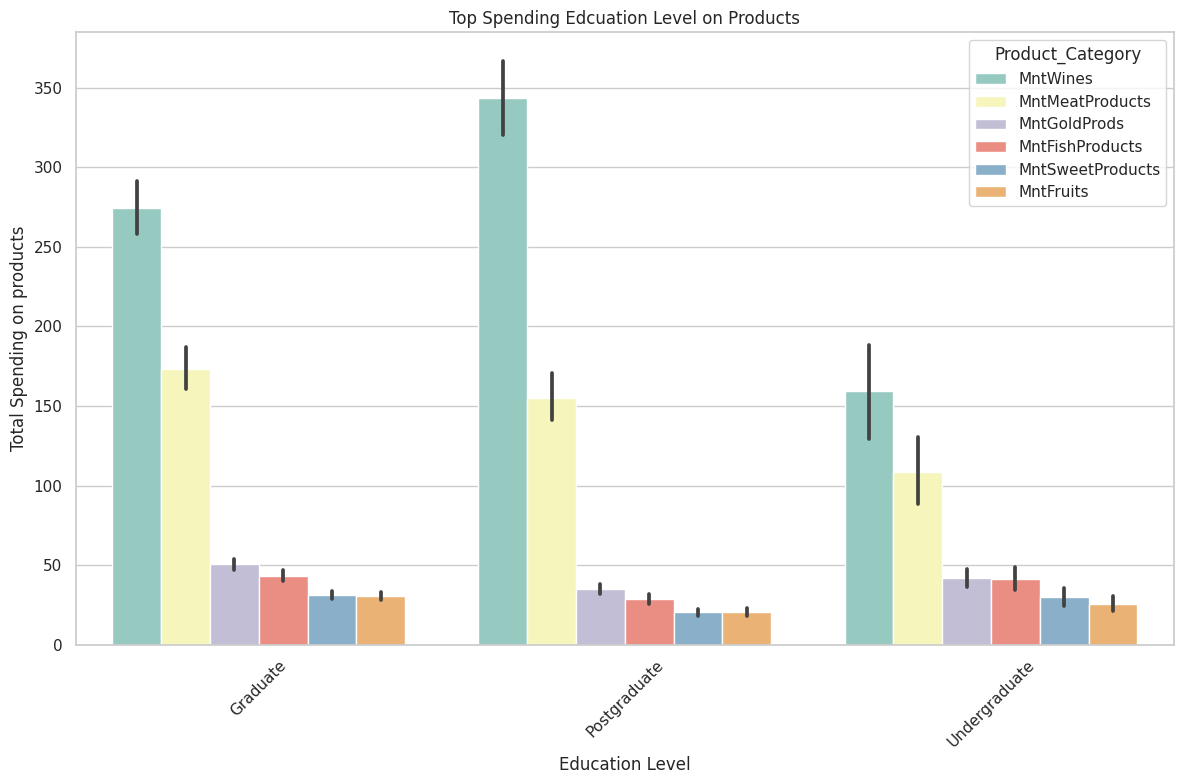

In [55]:
# Bar plot of spending on wine
features = df.columns[9:15].tolist()

df_melted = pd.melt(df, id_vars='Education', value_vars=df.columns[9:15], var_name='Product_Category')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='Education', y='value', 
            hue='Product_Category',palette='Set3', 
            hue_order=df_melted.groupby('Product_Category')['value'].sum().sort_values(ascending=False).index)
plt.xlabel('Education Level')
plt.ylabel(f'Total Spending on products')
plt.title(f'Top Spending Edcuation Level on Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Top Spending Edcuation Level on Products.jpg')
plt.show()

Insights:
- The most purchased products are Wines and Meats
- Customers with Postgraduate level tends to buy more wines that the others.
- The higher the level of education the more tends to buy wines and meats.
- Error Bars [Vertical black lines] are graphical representation of the variability of data an used on graphs to indicate the error or uncertainty in a reported measurements. So they are set to 95% of error.

### Explore Demographic factors regarding purchase behaviour by Customers

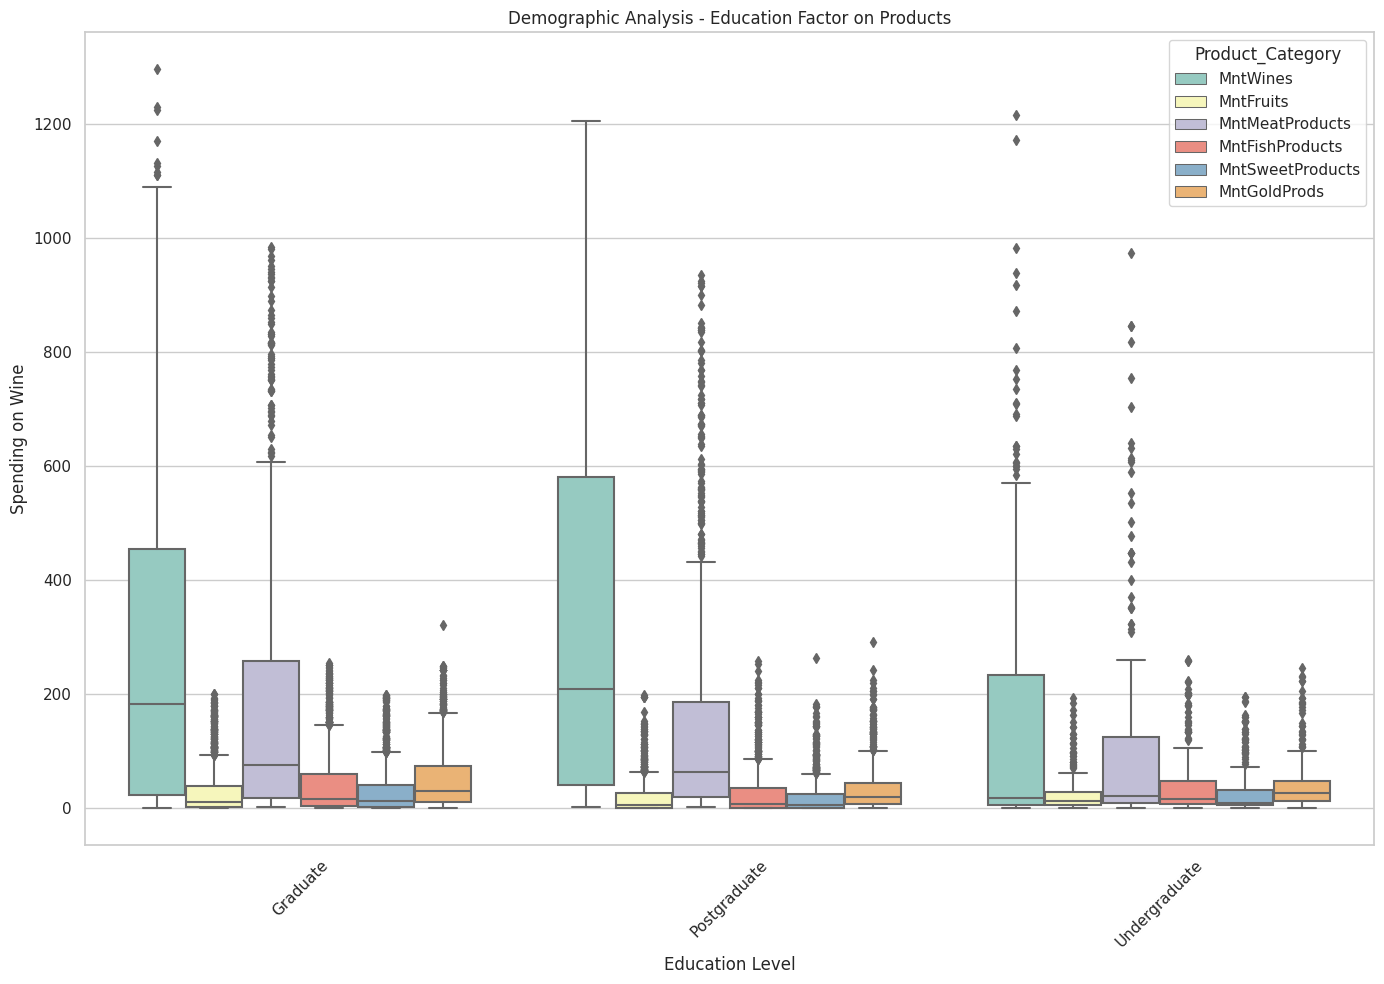

In [56]:
# Melt the DataFrame to combine columns 9 to 15 into a single column
melted_df = pd.melt(df, id_vars='Education', value_vars=df.columns[9:15], var_name='Product_Category')

# Example: Box plot of spending on wine by education level
plt.figure(figsize=(14, 10))
sns.boxplot(x='Education', y='value', hue='Product_Category', data=melted_df, palette='Set3')
plt.xlabel('Education Level')
plt.ylabel('Spending on Wine')
plt.title('Demographic Analysis - Education Factor on Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Demographic Analysis - Education Factor on Products.jpg')
plt.show()

Insights:
- The demographic insights on the education level indicate that there are customers who tends to buy more in every products based on the outliers dots shown in the above figure, which could be cluster on their own.
- In each product, the central of tendency (median) are low which represent huge number of customers buying each type of products with a huge quantaties.

### Let's Visualize Purchase Behaviour over Maritail Status

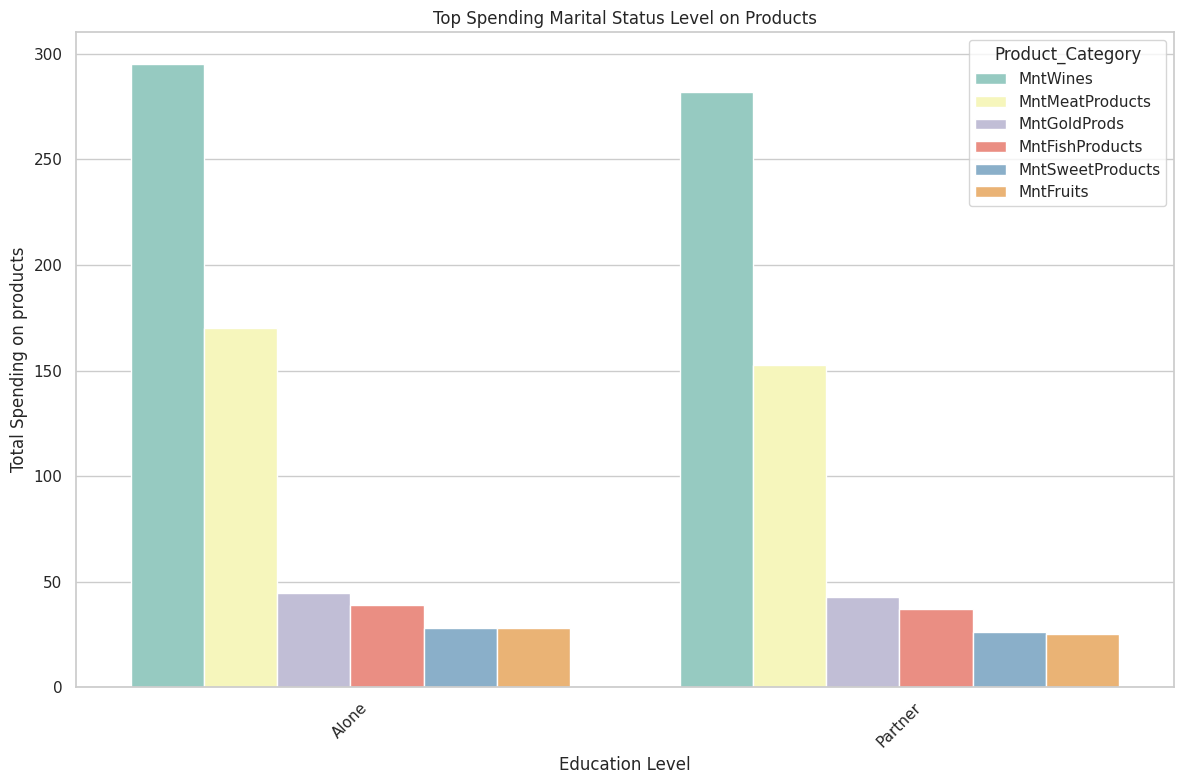

In [57]:
# Bar plot of spending on wine
features = df.columns[9:15].tolist()
factor = 'Living_With'
df_melted = pd.melt(df, id_vars=factor, value_vars=df.columns[9:15], var_name='Product_Category')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x=factor, y='value', 
            hue='Product_Category',palette='Set3', 
            hue_order=df_melted.groupby('Product_Category')['value'].sum().sort_values(ascending=False).index,
            ci=None)
plt.xlabel('Education Level')
plt.ylabel(f'Total Spending on products')
plt.title(f'Top Spending Marital Status Level on Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Top Spending Marital Status Level on Products.jpg')
plt.show()

Insight: 
- There are similarity between both products pruchases distribution over the Marital Status either you are Alone or living with a partner.

## Customer LifeTime Value (CLV) Analysis
- In this analysis, we will calculate the CLV for each customer based on their historical behavior, spending, and acceptance of campaigns, To gain insights about the average value for each accepted campaing.

In [58]:
# Assuming your dataset contains columns like 'Customer_ID', 'Income', 'MntWines', 'AcceptedCmp1', ...
# Define the period for CLV calculation (e.g., one year)
clv_period = (df.Dt_Customer.max() - df.Dt_Customer.min()).days

# Calculate total spending by each customer over the defined period
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate CLV for each customer by multiplying their average daily spending by the CLV period
df['CLV'] = (df['Total_Spending'] / clv_period) * 365


In [59]:
df.CLV.describe()

count    2143.000000
mean      302.899973
std       302.467349
min         4.177396
25%        35.507868
50%       192.682403
75%       524.263233
max      1318.490701
Name: CLV, dtype: float64

In [60]:
# Identify high-value customers (you can define your own threshold)
high_value_threshold = 1000
high_value_customers = df[df['CLV'] > high_value_threshold]

print(f'Percentage of high value customers= {100*high_value_customers.shape[0]/df.shape[0]}')

# Segment customers into categories based on CLV
df['CLV_Category'] = pd.cut(df['CLV'], bins=[0, 500, 1000, float('inf')], labels=['Low-Value', 'Medium-Value', 'High-Value'])

# Analyze campaign effectiveness
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

clv_values = []

for campaign in campaigns:
    campaign_clv = df.groupby(campaign)['CLV'].mean()
    print(f"Average CLV for customers who accepted {campaign}: {campaign_clv[1]}")
    clv_values.append(campaign_clv[1])

# Convert to DataFrame
df_campaign_clv = pd.DataFrame({'Campaign':campaigns, 'Average_CLV':clv_values}).sort_values(by='Average_CLV', ascending=False)

# Predict future revenue using CLV data (A simple baseline)
# Here, we'll calculate the potential future revenue for high-value customers.
future_revenue = high_value_customers['CLV'].sum()

print(f"Predicted Future Revenue from High-Value Customers: ${future_revenue:.2f}")


Percentage of high value customers= 2.659822678488101
Average CLV for customers who accepted AcceptedCmp1: 747.2110384449439
Average CLV for customers who accepted AcceptedCmp2: 601.3314475224347
Average CLV for customers who accepted AcceptedCmp3: 354.84102747514765
Average CLV for customers who accepted AcceptedCmp4: 549.0107049479552
Average CLV for customers who accepted AcceptedCmp5: 813.3303528850739
Predicted Future Revenue from High-Value Customers: $62104.83


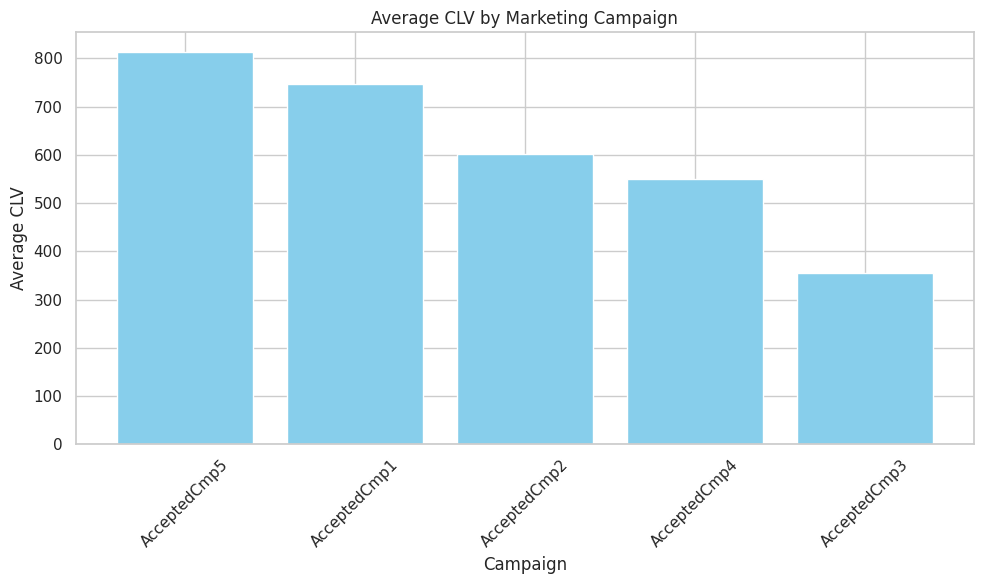

In [61]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_campaign_clv['Campaign'], df_campaign_clv['Average_CLV'], color='skyblue')
plt.xlabel('Campaign')
plt.ylabel('Average CLV')
plt.title('Average CLV by Marketing Campaign')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Average CLV by Marketing Campaign.jpg')
# Show the plot
plt.show()

Insights:
- The CLV metric tells us the net profit a company expects to earn from a customer over the entire duration of their relationship. CLV indicates the total expect revenue a company can earn from a customer throughout this duration.
- The Top highest CLV value is due to Compaign #5 then number #1.

### What is the most impactfull campaign used by customers?

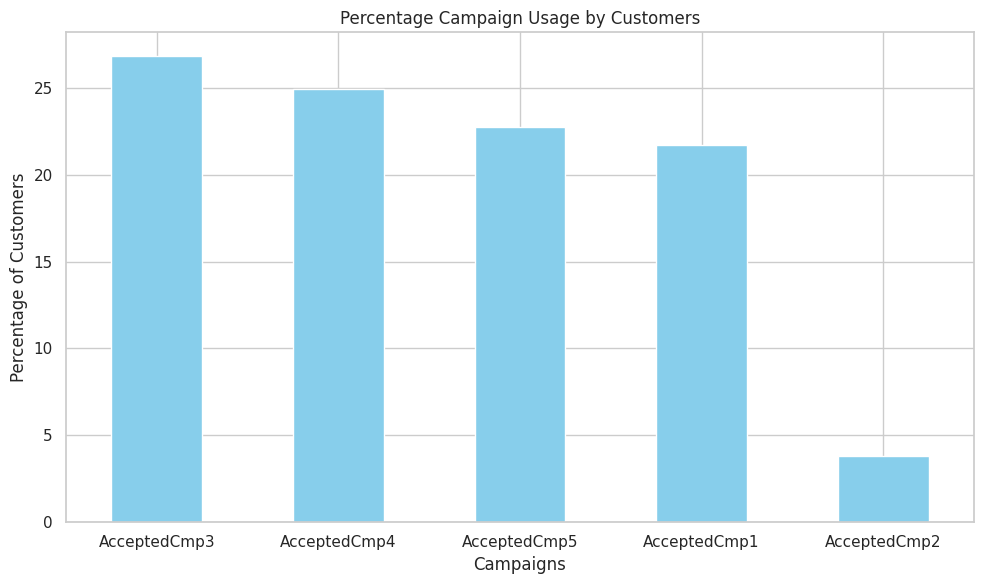

In [62]:
df_campaign_usage = df[campaigns].sum(axis=0).sort_values(ascending=False,)
# Normalize the values
df_campaign_usage = 100*df_campaign_usage/df_campaign_usage.sum()

# Create a bar plot to visualize campaign usage
plt.figure(figsize=(10, 6))
df_campaign_usage.plot(kind='bar', color='skyblue')
plt.xlabel('Campaigns')
plt.ylabel('Percentage of Customers')
plt.title('Percentage Campaign Usage by Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f'../report/plots/Percentage Campaign Usage by Customers.jpg')
# Show the plot
plt.show()

Insight:
- The top highest purchased was due to marketing campaign number 3, the lowest was due to campaign number 2.
- Although in markering campaign from the "Average CLV by Marketing Campaign" figure, has the lowest CLV, which push the customers to buy, as the CLV is suitable for them to make them buy.

## Analysis the Distribution of purchases from various channels

Summary Statistics for Purchase Channels:
       NumWebPurchases  NumStorePurchases  NumCatalogPurchases
count      2143.000000        2143.000000          2143.000000
mean          4.078395           5.805413             2.520299
std           2.724926           3.230042             2.627235
min           0.000000           0.000000             0.000000
25%           2.000000           3.000000             0.000000
50%           4.000000           5.000000             2.000000
75%           6.000000           8.000000             4.000000
max          27.000000          13.000000            11.000000


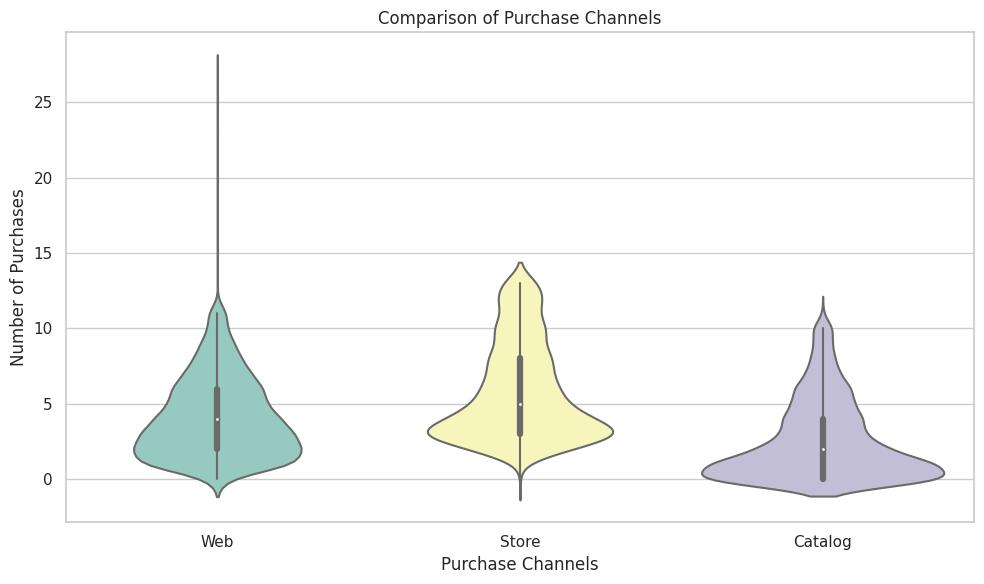

In [63]:
# Select the columns of interest
purchase_channels = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']

# Summary statistics for purchase channels
purchase_summary = df[purchase_channels].describe()

# Create a box plot to compare purchase channels
plt.figure(figsize=(10, 6))
# df[purchase_channels].boxplot()
# sns.boxplot(data=df[purchase_channels], palette='Set3')
sns.violinplot(data=df[purchase_channels], palette='Set3')
plt.xlabel('Purchase Channels')
plt.ylabel('Number of Purchases')
plt.title('Comparison of Purchase Channels')
plt.xticks([0, 1, 2], ['Web', 'Store', 'Catalog'])
plt.tight_layout()
plt.savefig(f'../report/plots/Comparison of Purchases Channels.jpg')
# Show summary statistics
print("Summary Statistics for Purchase Channels:")
print(purchase_summary)

# Show the plot
plt.show()

Insights: 
- The most higher used channel for purchases is through the Store, where most of the purchases are around 4 to 7 purchases per customer.
- Number of customers purchases in each channel varies, like in Web where the distribution of data is wider around 2 to 3 purchases where there are higher concentration, in Store channel where the the higher conectration of the data is around 3 to 5 purchases by customers, and in Catalog where the high concentration is around 0 to 1 purchases by customers. 

## Customer Recency Analysis
- Recency represents the number of days since a customer's last purchase, which is a key metric in understanding the customer engagment and retention.
- This analysis should provide us some insights into customer behaviour.

Summary Statistics for Recency:
count    2143.000000
mean       49.010733
std        28.957975
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


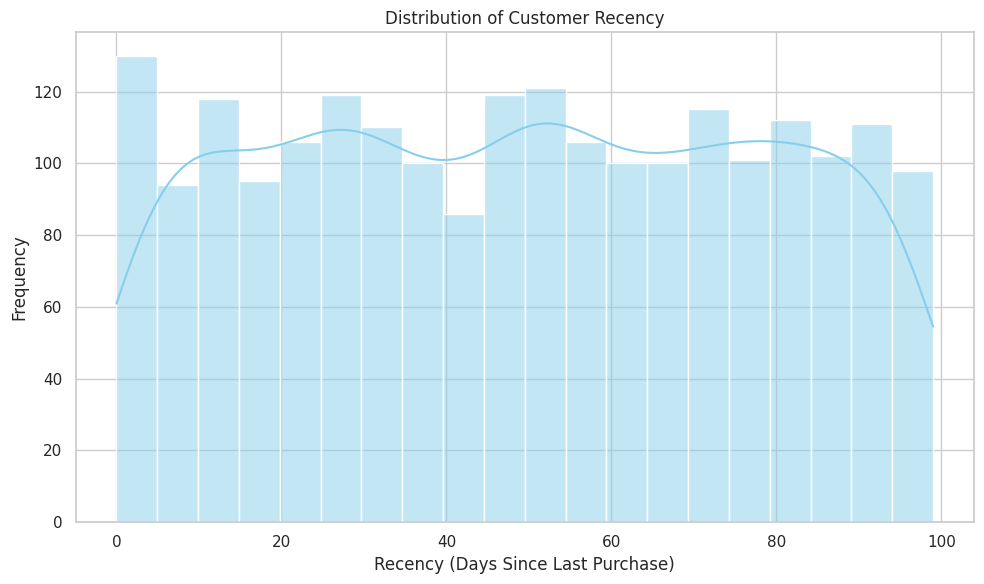

In [64]:
# Extract the 'Recency' column
recency = df['Recency']

# Summary statistics for recency
recency_summary = recency.describe()

# Create a histogram to visualize the distribution of recency
plt.figure(figsize=(10, 6))
sns.histplot(data=recency, bins=20, kde=True, color='skyblue')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Recency')
plt.tight_layout()

plt.savefig(f'../report/plots/Distribution of Customer Recency.jpg')

# Show summary statistics
print("Summary Statistics for Recency:")
print(recency_summary)

# Show the plot
plt.show()

Insights:
- The distribution looks like a uniform distribution, where there is no distinct pattern of customers recency.

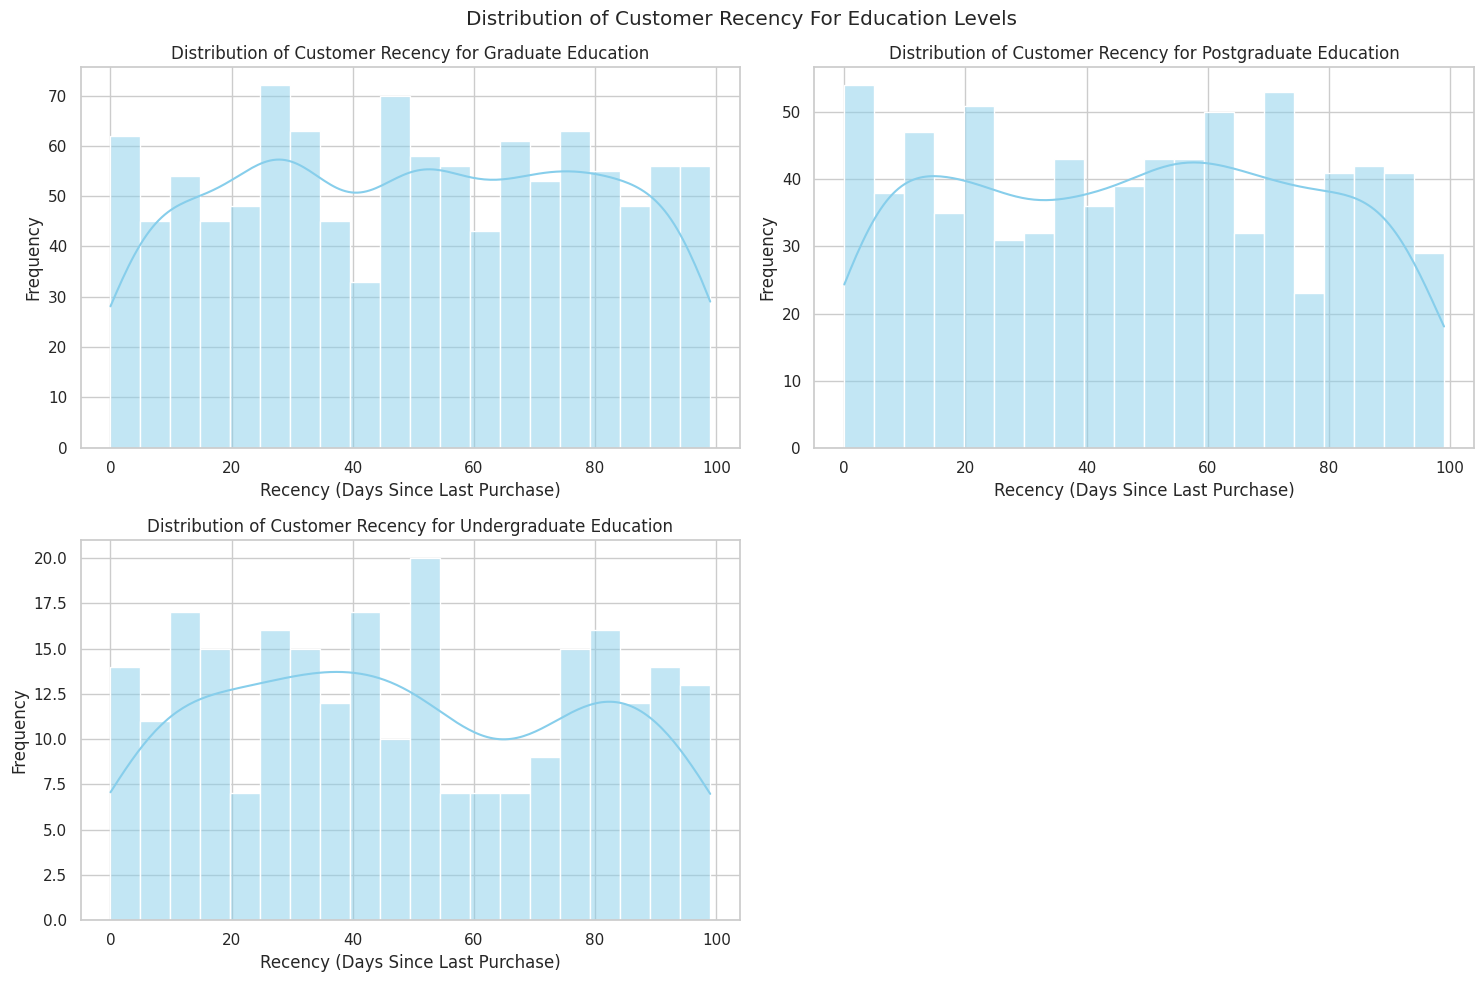

In [65]:
# List of unique education levels
education_levels = df['Education'].unique()

# Create subplots for each education level in two columns
fig, axes = plt.subplots(nrows=len(education_levels) // 2 + len(education_levels) % 2, ncols=2, figsize=(15, 6*len(education_levels) // 2 + len(education_levels) % 2))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each education level and create a histogram
for i, education_level in enumerate(education_levels):
    # Select data for the current education level
    recency = df[df['Education'] == education_level]['Recency']
    
    # Create a histogram for recency within the education level
    sns.histplot(data=recency, bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_xlabel('Recency (Days Since Last Purchase)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Customer Recency for {education_level} Education')


# Remove any remaining empty subplots
for i in range(len(education_levels), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Distribution of Customer Recency For Education Levels')

# Adjust the layout of subplots
plt.tight_layout()

plt.savefig(f'../report/plots/Distribution of Customer Recency For Education Levels.jpg')

# Show the plots
plt.show()

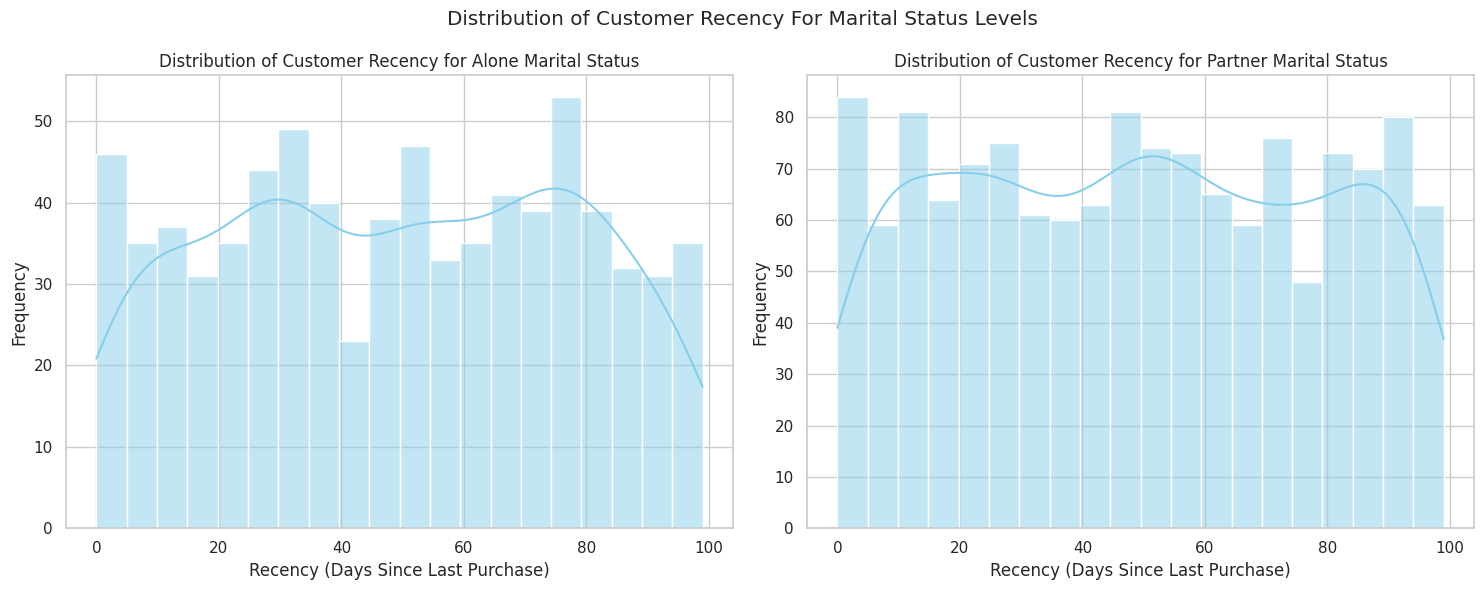

In [66]:
# List of unique education levels
feature_levels = df['Living_With'].unique()

# Create subplots for each education level in two columns
fig, axes = plt.subplots(nrows=len(feature_levels) // 2 + len(feature_levels) % 2, ncols=2, figsize=(15, 6*len(feature_levels) // 2 + len(feature_levels) % 2))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each education level and create a histogram
for i, feature_level in enumerate(feature_levels):
    # Select data for the current education level
    recency = df[df['Living_With'] == feature_level]['Recency']
    
    # Create a histogram for recency within the education level
    sns.histplot(data=recency, bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_xlabel('Recency (Days Since Last Purchase)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Customer Recency for {feature_level} Marital Status')

# Remove any remaining empty subplots
for i in range(len(feature_levels), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Distribution of Customer Recency For Marital Status Levels')

# Adjust the layout of subplots
plt.tight_layout()

plt.savefig(f'../report/plots/Distribution of Customer Recency For Marital Status Levels.jpg')

# Show the plots
plt.show()